In [17]:
# Importing everything needed
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [18]:
# Set up the Quantum Circuit
Grover_Search = QuantumCircuit(2)

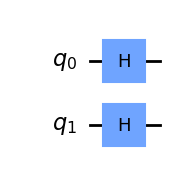

In [19]:
Grover_Search = initialize_s(Grover_Search,[0,1])
Grover_Search.draw(output='mpl')

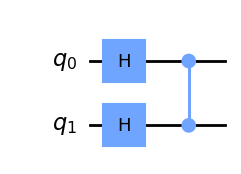

In [20]:
# Apply Oracle as CZ gates
Grover_Search.cz(0,1)
Grover_Search.draw(output='mpl')

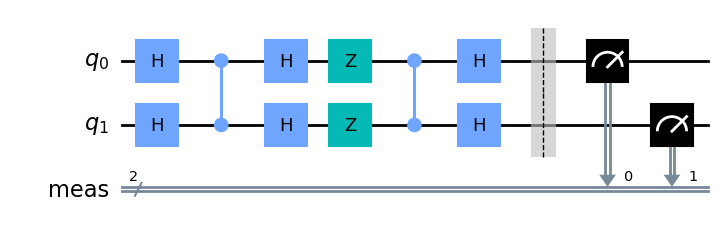

In [21]:
# Adding the rest of the gates
Grover_Search.h([0,1])
Grover_Search.z([0,1])
Grover_Search.cz(0,1)
Grover_Search.h([0,1])
Grover_Search.measure_all()
Grover_Search.draw(output='mpl')

C:\Users\mike_\AppData\Local\Temp\ipykernel_23752\132749814.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(job).result()


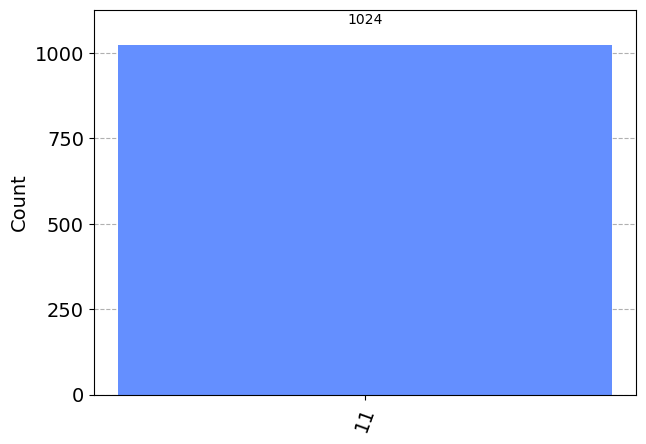

In [25]:
# Running Simulation
backend = Aer.get_backend('aer_simulator')
job = assemble(Grover_Search)
result = backend.run(job).result()
counts = result.get_counts()
plot_histogram(counts)

In [26]:
# Time for the good stuff (Real Quantum Computer)
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print(device)

C:\Users\mike_\AppData\Local\Temp\ipykernel_23752\3597108444.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


ibm_nairobi


In [28]:
# Telling the Quantum Computer what to do
transpiled_Grover_Search = transpile(Grover_Search, device, optimization_level=3)
job = device.run(transpiled_Grover_Search)
job_monitor(job, interval=2)

Job Status: job has successfully run


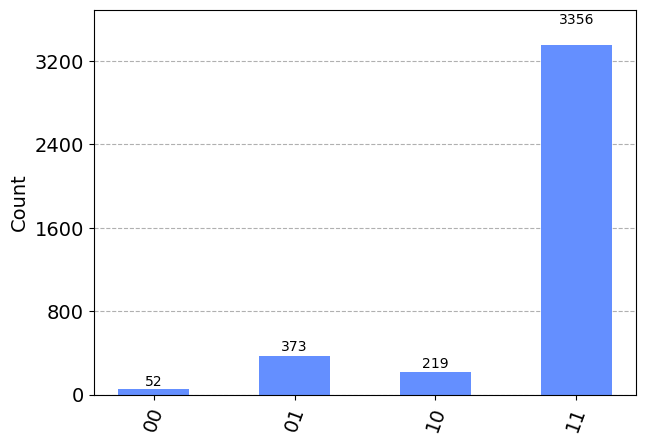

In [30]:
# Finally gertting the results
results = job.result()
answer = results.get_counts(Grover_Search)
plot_histogram(answer)